# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names and white-sounding names
print('Black sounding names: ', sum(data[data.race=='b'].call))
print('White sounding names: ', sum(data[data.race=='w'].call))

Black sounding names:  157.0
White sounding names:  235.0


In [4]:
#Check basis info of the data
pd.set_option('max_columns', 50)
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,...,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,1,0,0,1,0,Allison,f,w,0.0,1.0,0.0,c,a,384.0,0.989360,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,6,1,1,1,0,Kristen,f,w,1.0,0.0,0.0,c,a,384.0,0.080736,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,1,1,0,1,0,Lakisha,f,b,0.0,1.0,0.0,c,a,384.0,0.104301,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,5,0,1,1,1,Latonya,f,b,1.0,0.0,0.0,c,a,384.0,0.336165,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,5,1,1,1,0,Carrie,f,w,1.0,0.0,0.0,c,a,385.0,0.397595,...,0.727046,10.619399,0.070493,0.369903,10.007352,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


We will focus on two columns, the 'race' and 'call' since they directly relate to our question. Is there a difference between white-sounding names and 
black-sounding names in terms of the call back rate.<br>
<br>Thus, our null hypothesis is : there is <b>NO</b> association between black-sounding names and their call back rate.<br>
<br>The alternative hypothesis is: there is an association between black-sounding names and their call back rate.

Let's first look at the percetage of black and white who got the call back by extract the data into two arrays

In [5]:
black=data[data['race']=='b']['call']
white=data[data['race']=='w']['call']
black_perc=np.sum(black)/len(black)
white_perc=np.sum(white)/len(white)
print('Black call back rate: ', black_perc)
print('White call back rate: ', white_perc)

Black call back rate:  0.064476386037
White call back rate:  0.0965092402464


It seems that the white call back rate is higher than the black call back rate. To see whether this difference has anything to do with the race, we will do a 
permutation anaylsis. First combine the black and white data, permute and then assign the first 157 to black. Then calculate the sample mean distribution
and determine confidence levels. The p value will be the percentage of the permutated black sample that is lower than the current black percentage.

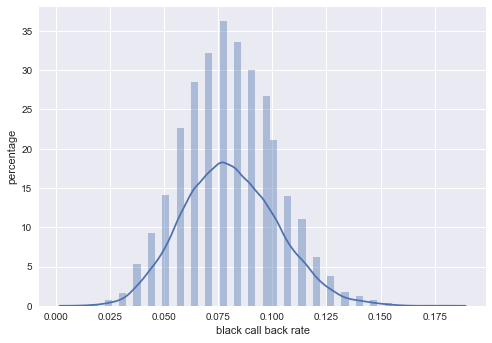

In [6]:
black_and_white=np.concatenate((black, white))
#Initiate an empty array to hold new black call back percentage values
black_perm_rep=np.empty(10000)
for i in range(10000):
    both_perm=np.random.permutation(black_and_white)
    black_perm=both_perm[:157]
    black_perm_rep[i]=np.sum(black_perm)/len(black_perm)
#to show the distribution of the resampled black call back percentage
sns.distplot(black_perm_rep)
plt.xlabel('black call back rate')
plt.ylabel('percentage')
plt.show()

In [7]:
#To get the 95% confidence intervals
print('95 percent confidence intervals: ', np.percentile(black_perm_rep, [2.5, 97.5]))

95 percent confidence intervals:  [ 0.03821656  0.12738854]


In [8]:
#To compute our p value
p_val=np.sum(black_perm_rep<black_perc)/len(black_perm_rep)
print('The p value is: ', p_val)

The p value is:  0.2733


We got a pretty large p values. About 27% of the time, we could get a call back rate lower than the original call back rate. So we accept our null hypothesis: 
<br>There is <b>NO</b> association between black-sounding names and their call back rate.

So my conclusion is: the race/name has <b>NO</b> bearing on the callback success as per the analysis above. To further investigate, we will have to consider other factors in their resumes, such as 'education', 'years of experience', and perhaps 'special skills'.